# Part 6: Large-scale and distributed optimization

In [1]:
import importlib

import numpy as np # linear algebra
import pandas as pd #dataframe library
import sklearn # machine learning library
assert sklearn.__version__ >= '0.2'
from sklearn import datasets
import random
np.random.seed(seed=42) # to have same results each time
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import useful_functions
importlib.reload(useful_functions)
from useful_functions import generate_dataset, unison_shuffled_copies, get_train_test_datasets, gradient_descent
from useful_functions import plot_convergence_rate, plot_evolution_on_test_error, plot_evolution_on_test_error_with_bias


### Question 1: Apply randomized block coordinate descent to your problem by considering a full batch of your dataset, and compare it with gradient descent. Is the use of coordinate descent beneficial on your problem?

In [2]:
#% of rows to include in training dataset
TRAINING_RATIO = 0.75

In [3]:
dataset = sklearn.datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
A = dataset['data']
Y = dataset['target']
A_shuffled, Y_shuffled = unison_shuffled_copies(A, Y)
A_train, Y_train, A_test, Y_test = get_train_test_datasets(A_shuffled, Y_shuffled,TRAINING_RATIO)

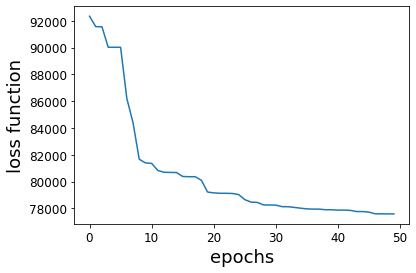

Optimal parameter is:
[ 0.72567387  0.30569015  0.30617323 -0.30070008  0.0724373  -0.05183392
  0.08454453  0.12463869]


In [5]:
# Coordinate GD implementation 
n_epochs = 50
step_size = 1e-5
n_sample = A_train.shape[0]
D = A_train.shape[1] # dimension of pbm 
Dblock = 1
x = np.random.rand(D) # random initialization

loss_function_train_coordinate = []
epochs = []

for epoch in range(n_epochs):
    #here only one iteration per epoch
    epochs.append(epoch)
    
    loss_function_train = np.linalg.norm(np.dot(A_train,x)-Y_train)**2
    loss_function_train_coordinate.append(loss_function_train)
    gradients = 2*A_train.T.dot(np.dot(A_train,x)-Y_train) #gradient of the smooth part 

    #coordinate 
    jk = np.random.choice(D,Dblock,replace=False) # Uniform draw without replacement
    x[jk] = x[jk] - step_size*gradients[jk]


plt.plot(epochs, loss_function_train_coordinate)   
plt.xlabel("epochs", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.show()
print("Optimal parameter is:")
print(x)

### Question 2: Combine randomized block coordinate descent with stochastic gradient (i.e. the method from Part 3). Do you observe a benefit from using coordinates together with stochastic gradient?

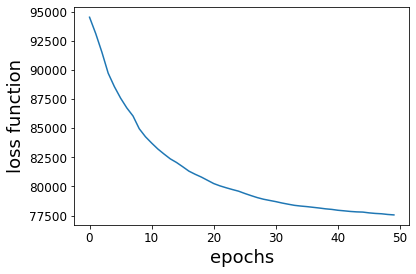

Optimal parameter is:
[ 0.84379913  0.34593435 -0.02755118  0.02326418  0.17756903 -0.04561557
  0.26794078  0.29768073]


In [7]:
# Coordinate SGD implementation 
n_epochs = 50
step_size = 1e-5
n_sample = A_train.shape[0]
D = A_train.shape[1] # dimension of pbm 
Dblock = 1
iter_per_epoch = A_train.shape[0]

x = np.random.rand(D) # random initialization

loss_function_array_sgd_coordinate = []
loss_function_array_sgd_coordinate_iteration = []
epochs = []
iteration = []


for epoch in range(n_epochs):
    epochs.append(epoch)
    
    loss_function_train = np.linalg.norm(np.dot(A_train,x)-Y_train)**2
    loss_function_array_sgd_coordinate.append(loss_function_train)

    for i in range(iter_per_epoch):
        iteration.append(iter_per_epoch*epoch+i)
        loss_function_train = np.linalg.norm(np.dot(A_train,x)-Y_train)**2
        loss_function_array_sgd_coordinate_iteration.append(loss_function_train)
        random_index = np.random.randint(iter_per_epoch)
        Ai = A_train[random_index:random_index+1]
        Yi = Y_train[random_index:random_index+1]
        gradients = 2*Ai.T.dot(Ai.dot(x) - Yi)

        #coordinate 
        jk = np.random.choice(D,Dblock,replace=False) # Uniform draw without replacement
        x[jk] = x[jk] - step_size*gradients[jk]


plt.plot(epochs, loss_function_array_sgd_coordinate)   
plt.xlabel("epochs", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.show()
print("Optimal parameter is:")
print(x)